# Task 4.10 Part 1
# Question1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r"C:\Users\ap101\INSTACART BASKET ANALYSIS"

In [4]:
path

'C:\\Users\\ap101\\INSTACART BASKET ANALYSIS'

In [5]:
df_ord_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_orders_products_customers_merged.pkl'))

In [6]:
df_ord_prods_cust.shape

(32641268, 33)

# Question 2: Consider any security implications that might exist for this new data. You'll need to address any PII data before continuing your analysis

In [7]:
# Check data
df_ord_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
# Data does contain PII information that should be addressed. The PII info that needs to be addressed is first and last name
# Drop first and last name data
df_PII = df_ord_prods_cust.drop(columns = ['first_name', 'last_name'])

In [11]:
df_PII

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,...,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,...,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,...,Low Spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32641263,2977660,206209,13,1,12,7.0,38730.0,6.0,0.0,Brownie Crunch High Protein Bar,...,Low Spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969
32641264,2977660,206209,13,1,12,7.0,31477.0,7.0,0.0,High Protein Bar Chunky Peanut Butter,...,Low Spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969
32641265,2977660,206209,13,1,12,7.0,6567.0,8.0,0.0,Chocolate Peanut Butter Protein Bar,...,Low Spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969
32641266,2977660,206209,13,1,12,7.0,22920.0,9.0,0.0,Roasted & Salted Shelled Pistachios,...,Low Spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969


# Question 3: The instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You'll need to create a "Region" column based on the State column from the customers data set

Part 1: Use the region information in this Wikipedia article to create your column 

In [12]:
# define the function
result = []
for value in df_ord_prods_cust['state']:
    
  if (value in ['Maine', 'New Hampshire', 'Vermont','Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
    result.append ('Northeast')
  elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana','Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
    result.append ('Midwest')
  elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama']):
    result.append ('South') 
  else: result.append ('West')

In [13]:
# Check
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'We

In [15]:
df_ord_prods_cust['region'] = result

In [16]:
df_ord_prods_cust['region'].value_counts(dropna = False)

West         10937597
South         8286304
Midwest       7652535
Northeast     5764832
Name: region, dtype: int64

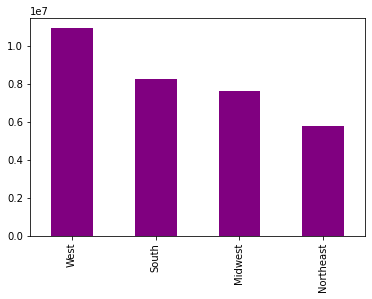

In [17]:
# Create a visualization for Region
region = df_ord_prods_cust['region'].value_counts().plot.bar(color = 'purple')

In [18]:
# Export the file into Visualizations
region = region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region.png'))

Part 2: Determine whether there's a difference in spending habits between the different U.S. regions.

In [19]:
# Create a crosstab
crosstab = pd.crosstab(df_ord_prods_cust['region'], df_ord_prods_cust['spending_flag'], dropna = False)

In [20]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,157347,7495188
Northeast,109159,5655673
South,165816,8120488
West,207713,10729884


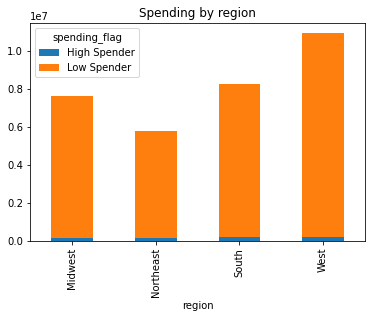

In [21]:
crosstab = crosstab.plot(kind = 'bar', stacked = True, title = 'Spending by region') 

In [22]:
# Export file into Visualizations
crosstab.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'crosstab.png'))

# Question 4: The instacart CEO isn't interested in customers who don't generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure to support the example)

In [25]:
df_ord_prods_cust['max_order'].value_counts(dropna = False)

100    1173687
7       825922
9       822821
10      819874
8       816445
        ...   
94       50497
91       48455
98       45019
99       44651
97       40523
Name: max_order, Length: 97, dtype: int64

In [26]:
# Low activity flag for less than 5 orders
df_ord_prods_cust.loc[df_ord_prods_cust['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [30]:
# Normal activity flag for more than 5 orders
df_ord_prods_cust.loc[df_ord_prods_cust['max_order'] >= 5, 'exclusion_flag'] = 'Normal activity customer'

In [31]:
df_ord_prods_cust['exclusion_flag'].value_counts (dropna = False)

Normal activity customer    31929979
Low activity customer         711289
Name: exclusion_flag, dtype: int64

In [32]:
# Create dataframe for low activity customers
df_low_activity = df_ord_prods_cust[df_ord_prods_cust['exclusion_flag'] =='Low activity customer']

In [33]:
df_low_activity['max_order'].value_counts (dropna = False)

4    711289
Name: max_order, dtype: int64

In [34]:
# Create dataframe for normal activity customers
df_normal_activity_customer = df_ord_prods_cust[df_ord_prods_cust['exclusion_flag'] =='Normal activity customer']

In [35]:
# Check normal activity customer data
df_normal_activity_customer['max_order'].value_counts (dropna = False)

100    1173687
7       825922
9       822821
10      819874
8       816445
        ...   
94       50497
91       48455
98       45019
99       44651
97       40523
Name: max_order, Length: 96, dtype: int64

In [36]:
# Export file for normal activity customer data
df_normal_activity_customer.to_pickle(os.path.join(path,'02 Data','Prepared Data','normal_activity_customer.pkl'))

In [37]:
# Export file for low activity customer data
df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customer.pkl'))

# Question 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Using age as the variable

In [38]:
df_ord_prods_cust['age'].value_counts().sort_index()

18    504085
19    523536
20    506558
21    516217
22    517624
       ...  
77    505908
78    498941
79    533539
80    518854
81    513068
Name: age, Length: 64, dtype: int64

In [39]:
# Check minimum age of customer
df_ord_prods_cust.age.min()

18

In [40]:
# Check maximum age of customer
df_ord_prods_cust.age.max()

81

In [41]:
df_ord_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer


In [44]:
# Create a list for ages
age_list = []
for value in df_ord_prods_cust ['age']:
    if (value >= 18) and (value <= 24):
        age_list.append('18-24')
    elif (value >= 25) and (value <= 34):
        age_list.append('25-34')
    elif (value >= 35) and (value <= 44):
        age_list.append('35-44')
    elif (value >= 45) and (value <= 54):
        age_list.append('45-54')
    elif (value >= 55) and (value <= 64):
        age_list.append('55-64')
    elif (value >= 65) and (value <= 74):
        age_list.append('65-74')
    elif (value >= 75) and (value <= 84):
        age_list.append('75-84')
    elif (value >= 85):
        age_list.append('85+')

In [45]:
# Applying the function
df_ord_prods_cust['age_list'] = age_list

In [46]:
# Count of the age list
df_ord_prods_cust['age_list'].value_counts(dropna = False)

45-54    5148479
35-44    5099010
25-34    5091602
55-64    5065670
65-74    5041363
18-24    3598969
75-84    3596175
Name: age_list, dtype: int64

In [48]:
df_ord_prods_cust['age_list'].value_counts().sort_index()

18-24    3598969
25-34    5091602
35-44    5099010
45-54    5148479
55-64    5065670
65-74    5041363
75-84    3596175
Name: age_list, dtype: int64

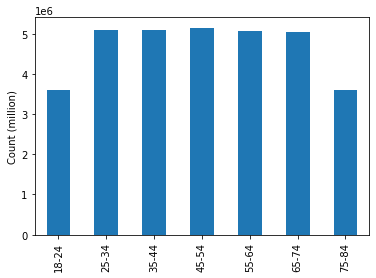

In [49]:
# Create visual for age_list
bar_age_list = df_ord_prods_cust['age_list'].value_counts().sort_index().plot.bar(ylabel = 'Count (million)')

In [52]:
# Export file into Visualization
bar_age_list.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_list.png'))

In [53]:
# Check spending habit of each age group
crosstab_age_spending = pd.crosstab(df_ord_prods_cust['age_list'], df_ord_prods_cust['spending_flag'], dropna = False )

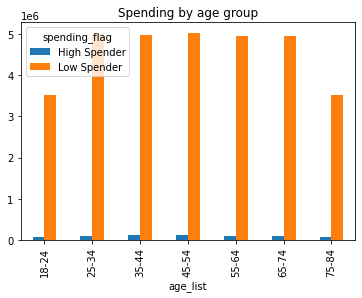

In [54]:
crosstab_age_spending = crosstab_age_spending.plot(kind = 'bar', stacked = False, title = 'Spending by age group')

In [55]:
# Export file into visualization
crosstab_age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_spending.png'))

Using income as variable

In [56]:
df_ord_prods_cust['income'].value_counts().sort_index()

25903      21
25911      29
25937      40
25941      32
25955     393
         ... 
584097    827
590790     55
591089    177
592409    319
593901    641
Name: income, Length: 108012, dtype: int64

In [57]:
# Check minimum income
df_ord_prods_cust.income.min()

25903

In [58]:
# Check maximum income
df_ord_prods_cust.income.max()

593901

In [64]:
# Create 'income' list

income_list = []

for value in df_ord_prods_cust ['income']:
    if value < 25000:
        income_list.append('Below poverty level')
    elif (value >= 25000) and (value <= 50000):
        income_list.append('Low income')
    elif (value >= 50000) and (value <= 75000):
        income_list.append('Middle class')
    elif (value >= 75000) and (value <= 100000):
        income_list.append('Middle class')
    elif (value >= 100000) and (value <= 125000):
        income_list.append('Middle class')
    elif (value >= 125000) and (value <= 150000):
        income_list.append('Upper Middle class')
    elif (value >= 150000) and (value <= 175000):
        income_list.append('Upper Middle class')
    elif (value >= 175000) and (value <= 200000):
        income_list.append('Upper Middle class')
    elif (value >= 200000) and (value <= 300000):
        income_list.append('Upper class')
    elif (value >= 300000) and (value <= 400000):
        income_list.append('Upper class')
    elif (value >= 400000) and (value <= 500000):
        income_list.append('Upper class')
    elif value >= 500000:
        income_list.append('Upper class')

In [65]:
# Apply income list
df_ord_prods_cust['income_list'] = income_list

In [66]:
# Coun of income list
df_ord_prods_cust['income_list'].value_counts(dropna = False)

Middle class          20319776
Upper Middle class     8429791
Low income             3632050
Upper class             259651
Name: income_list, dtype: int64

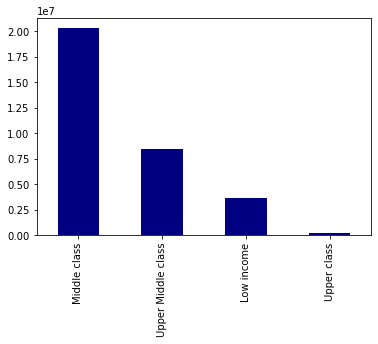

In [67]:
# Create visual for income list
income = df_ord_prods_cust['income_list'].value_counts().plot.bar(color = 'navy')


In [69]:
# Export file to visulazation
income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income.png'))

Family status as a variable

In [70]:
df_ord_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_of_dependants,fam_status,income,region,exclusion_flag,age_list,income_list
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,25-34,Low income
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,25-34,Low income
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,25-34,Low income
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,25-34,Low income
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer,25-34,Low income


In [72]:
# Count of family status
df_ord_prods_cust['fam_status'].value_counts(dropna = False)

married                             22922405
single                               5364847
divorced/widowed                     2792100
living with parents and siblings     1561916
Name: fam_status, dtype: int64

In [73]:
# Percentage of married couples
married =  22922405 / (22922405+5364847+2792100+1561916)*100   

In [74]:
# Percentage of single people
single = 5364847 / (22922405+5364847+2792100+1561916)*100

In [75]:
# Precent of divorced_widowed
divorced_widowed = 2792100 / (22922405+5364847+2792100+1561916)*100

In [76]:
# Percent of living with parents and siblings
liv_with_par_sib = 1561916 /  (22922405+5364847+2792100+1561916)*100

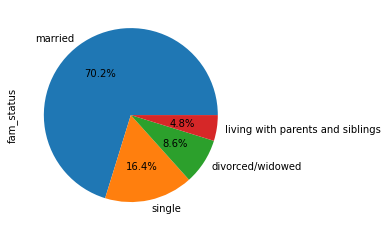

In [77]:
fam_status = df_ord_prods_cust['fam_status'].value_counts().plot.pie(autopct = '%1.1f%%')

In [78]:
# Export file into visualizations
fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status.png'))

Dependant variable

In [108]:
# Coun of dependants
df_ord_prods_cust['number_of_dependants'].value_counts(dropna = False)

3    8194109
0    8156947
2    8150216
1    8139996
Name: number_of_dependants, dtype: int64

In [109]:
crosstab_dep = pd.crosstab(df_ord_prods_cust['income_list'], df_ord_prods_cust['number_of_dependants'], dropna = False )

In [110]:
crosstab_dep

number_of_dependants,0,1,2,3
income_list,,,,
Low income,913462,893495,917927,907166
Middle class,5044603,5097730,5069089,5108354
Upper Middle class,2133009,2088329,2092122,2116331
Upper class,65873,60442,71078,62258


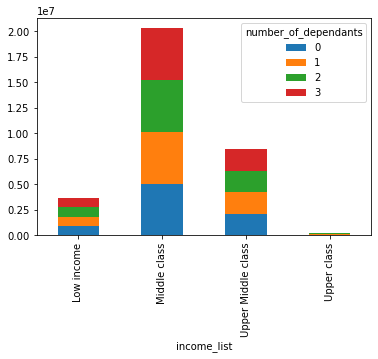

In [111]:
crosstab_dep = crosstab_dep.plot(kind = 'bar', stacked = True)

In [112]:
# Export file
crosstab_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_dep.png'))

# Question 6: Create appropriate visual to show distribution of files.

See above visuals

# Question 7: Aggregate the max, mean and min variables on customer profile level for usage frequency and expenditure

In [116]:
# Order number by income list
df_ord_prods_cust.groupby('income_list').agg({'order_number': ['mean', 'min', 'max']})

order_number         
                           mean min  max
income_list                             
Low income            15.883062   1  100
Middle class          17.301898   1  100
Upper Middle class    17.205042   1  100
Upper class           19.747349   1  100

In [117]:
# Order number by fam status
df_ord_prods_cust.groupby('fam_status').agg({'order_number': ['mean', 'min', 'max']})

order_number         
                                         mean min  max
fam_status                                            
divorced/widowed                    17.270492   1  100
living with parents and siblings    17.292518   1  100
married                             17.084499   1  100
single                              17.255456   1  100

In [118]:
# Order number by age 
df_ord_prods_cust.groupby('age_list').agg({'order_number': ['mean', 'min', 'max']})

order_number         
                 mean min  max
age_list                      
18-24       17.278982   1  100
25-34       17.003690   1  100
35-44       17.190306   1  100
45-54       17.171532   1  100
55-64       17.163757   1  100
65-74       17.081206   1  100
75-84       17.112419   1  100

# Question 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

In [121]:
region_spending_crosstab = pd.crosstab(df_ord_prods_cust['region'], df_ord_prods_cust['spending_flag'], dropna = False)

In [123]:
region_spending_crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,157347,7495188
Northeast,109159,5655673
South,165816,8120488
West,207713,10729884


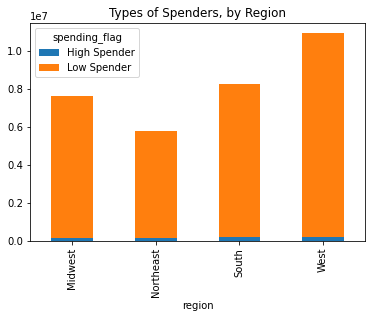

In [124]:
region_spending_chart = region_spending_crosstab.plot.bar(stacked = True, title = 'Types of Spenders, by Region')

In [125]:
# Export file into Visualization
region_spending_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_chart.png'))

In [126]:
crosstab_region_fam_status= pd.crosstab(df_ord_prods_cust['region'], df_ord_prods_cust['fam_status'], dropna = False )

In [127]:
crosstab_region_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,651031,369105,5364374,1268025
Northeast,504698,270061,4065858,924215
South,698337,403475,5818856,1365636
West,938034,519275,7673317,1806971


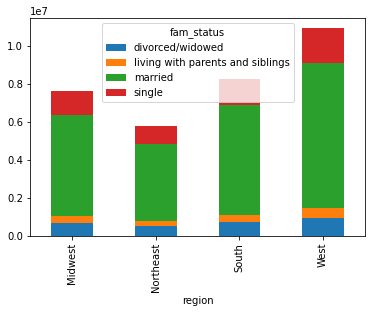

In [129]:
crosstab_region_fam_status = crosstab_region_fam_status.plot(kind = 'bar', stacked = True)

In [130]:
# Export file into visualization
crosstab_region_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_fam_status.png'))

In [132]:
crosstab_region_income_list = pd.crosstab(df_ord_prods_cust['income_list'], df_ord_prods_cust['region'], dropna = False )

In [133]:
crosstab_region_income_list

region,Midwest,Northeast,South,West
income_list,,,,
Low income,847185,633998,944499,1206368
Middle class,4737915,3580897,5169086,6831878
Upper Middle class,2001872,1508626,2104212,2815081
Upper class,65563,41311,68507,84270


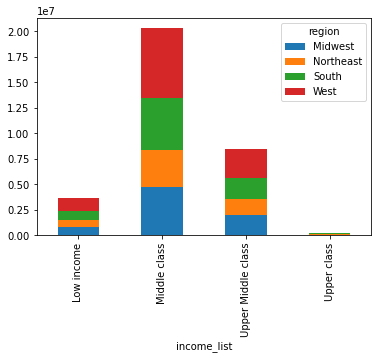

In [134]:
crosstab_region_income_list =crosstab_region_income_list .plot(kind = 'bar', stacked = True)

In [135]:
# Export file into visualization
crosstab_region_income_list.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_income_list'))

# Question 10: Tidy up your script, export your final data set, and save your notebook.

In [136]:
df_ord_prods_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Task_4.10.pkl'))